In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
df = pd.read_csv('iris.csv')

In [43]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [553]:
X = df.iloc[:,[0,3]]

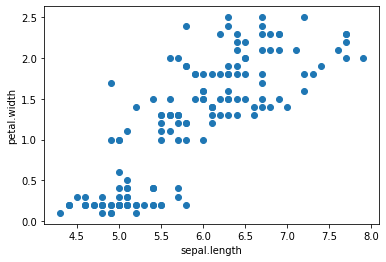

In [554]:
plt.scatter(X.iloc[:,0],X.iloc[:,1])
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

In [555]:
X_data = X.to_numpy()

In [79]:
m = X_data.shape[0]
K = 3

# Initialize $\mu$

In [148]:
ind = np.random.randint(0,m,(K,))
mu = X_data[ind]

# Calculate C indexes

In [154]:
c = np.array([np.linalg.norm(x-mu, axis=1).argmin() for x in X_data],dtype=np.int)

In [155]:
c

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 2,
       1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1])

# Calculate mu

In [166]:
mu = np.array([X_data[c==i].mean(axis=0) for i in np.unique(c)])

In [167]:
mu

array([[4.94081633, 3.11020408],
       [6.3045977 , 3.12413793],
       [6.13571429, 2.45714286]])

0.5771610997793076


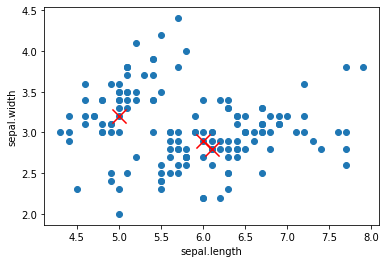

In [418]:
ind = np.random.randint(0,m,(3,))
mu = X_data[ind]
cost_1 = np.linalg.norm(X_data - mu[c],axis=1).mean()
print(cost_1)
plt.scatter(X.iloc[:,0],X.iloc[:,1])
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.scatter(mu[:,0], mu[:,1], marker='x', s=200, linewidths=1,c='r')
plt.show()

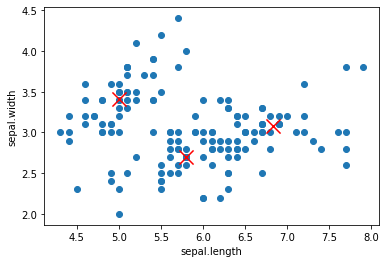

0.0


In [423]:
c = np.array([np.linalg.norm(x-mu, axis=1).argmin() for x in X_data],dtype=np.int)
mu = np.array([X_data[c==i].mean(axis=0) for i in np.unique(c)])
plt.scatter(X.iloc[:,0],X.iloc[:,1])
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.scatter(mu[:,0], mu[:,1], marker='x', s=200, linewidths=1,c='r')
plt.show()
cost_2 = np.linalg.norm(X_data - mu[c],axis=1).mean()
print(abs(cost_2-cost_1))
cost_1 = cost_2

[[5.00555556 0.3037037 ]
 [6.85714286 2.01190476]
 [5.89259259 1.46296296]]


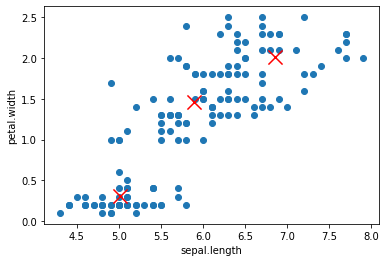

diff = 0.0 
count = 10 
cost = 0.41425853719442846


In [605]:
ind = np.random.randint(0,m,(3,))
mu = X_data[ind]
c = np.array([np.linalg.norm(x-mu, axis=1).argmin() for x in X_data],dtype=np.int)
cost_1 = np.linalg.norm(X_data - mu[c],axis=1).mean()

diff = 1
count = 0
while diff>0.0001:
    c = np.array([np.linalg.norm(x-mu, axis=1).argmin() for x in X_data],dtype=np.int)
    mu = np.array([X_data[c==i].mean(axis=0) for i in np.unique(c)])
    cost_2 = np.linalg.norm(X_data - mu[c],axis=1).mean()
    diff = abs(cost_2-cost_1)
    cost_1 = cost_2
    count += 1
    
print(mu)
plt.scatter(X.iloc[:,0],X.iloc[:,1])
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.scatter(mu[:,0], mu[:,1], marker='x', s=200, linewidths=1,c='r')
plt.show()
print('diff = {} \ncount = {} \ncost = {}'.format(diff,count,cost_2))